In [97]:
import mdtraj as md
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np

In [82]:
vdw_rad = 0.17
top = '../data/water_top.pdb'
coord_labels = ['x', 'y', 'z']

In [83]:
df_all = []
for traj_num in [1, 3, 4, 6, 7, 8, 9, 10]:
    traj = md.load('../data/water_nojump_{}-strided.xtc'.format(traj_num), top=top)

    dt = traj.timestep # timestep in ps

    com = md.compute_center_of_mass(traj)

    df = pd.DataFrame({coord_labels[i]: com[:,i] for i in range(3)})
    df['traj_num'] = traj_num
    df['Time (ns)'] = traj.time/1000
    df_all.append(df)
df = pd.concat(df_all)

In [84]:
df_melt = df.melt(id_vars=['traj_num', 'Time (ns)'], value_name='Coordinate (nm)', var_name='Dimension')
df_melt['Coordinate (vdw)'] = df_melt['Coordinate (nm)']/vdw_rad

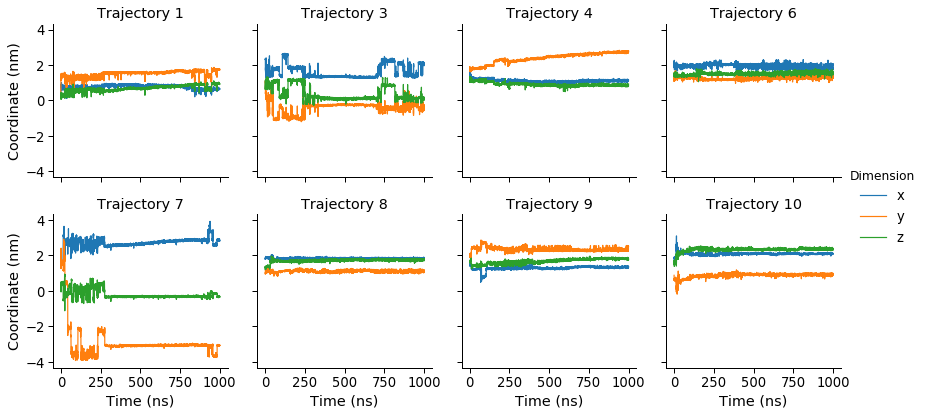

In [85]:
with sns.plotting_context('paper', font_scale=1.5):
    g = sns.FacetGrid(df_melt, col='traj_num', col_wrap=4, hue='Dimension',sharey=True )
    g.map(plt.plot, 'Time (ns)', 'Coordinate (nm)')
    g.set_titles('Trajectory {col_name}')
#     g.set(ylabel=r'$R^{VdW}( H_{2}0 )$')
    g.add_legend()
    plt.savefig('slow_dyanmics.jpg', dpi=300)

In [86]:
df['square_diff'] = df.loc[:,df.columns.difference(['Time (ns)'])].groupby('traj_num').diff().apply(lambda x: x**2).sum(axis=1)

In [98]:
df['rmsd'] = np.sqrt(df.groupby('traj_num')['square_diff'].cumsum())

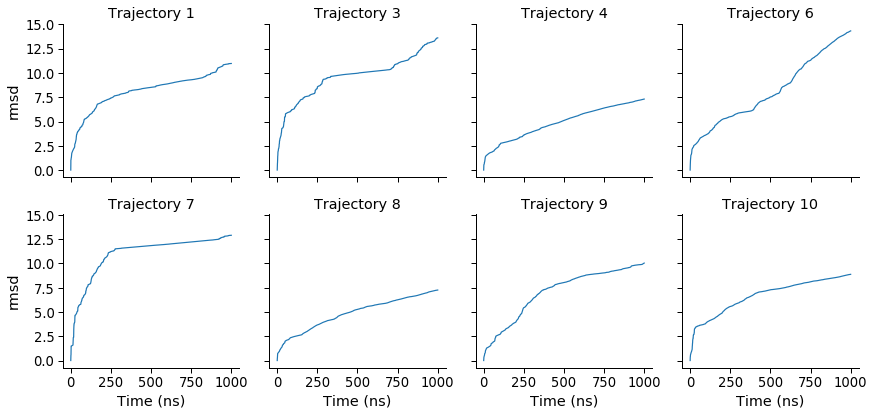

In [100]:
with sns.plotting_context('paper', font_scale=1.5):
    g = sns.FacetGrid(df, col='traj_num', col_wrap=4,sharey=True )
    g.map(plt.plot, 'Time (ns)', 'rmsd')
    g.set_titles('Trajectory {col_name}')
#     g.set(ylabel=r'$R^{VdW}( H_{2}0 )$')
    g.add_legend()
#     plt.savefig('slow_dyanmics_rmsd.jpg', dpi=300)